In [1]:
from deap import base, creator, tools

import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Problem constants
# Length of bit string to be optimized
ONE_MAX_LENGTH = 100

In [3]:
# Genetic Algorithm constants
POPULATION_SIZE = 200
# Probability for crossover
P_CROSSOVER = 0.9
# Probability for mutating an individual
P_MUTATION = 0.1
MAX_GENERATIONS = 50

In [4]:
# Set the random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [5]:
toolbox = base.Toolbox()
# Create an operator defining the alias of `random.randint(0, 1)` as `zeroOrOne`
toolbox.register("zeroOrOne", random.randint, 0, 1)

# Populate a `list` with `initRepeat`
# randomList = tools.initRepeat(list, toolbox.zeroOrOne, 30)
# print(randomList)

In [6]:
# Define the fitness strategy by extending the `base.Fitness` class
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [7]:
# Create the `Individual` class based on `list`
creator.create("Individual", list, fitness=creator.FitnessMax)

In [8]:
# Create the `individualCreator` operator to fill up an `Individual` instance
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

In [9]:
# Create the population operator to generate a list of individuals
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [10]:
i = [1, 2, 3, 4, 5]
# A Tuple
sum(i),

(15,)

In [11]:
# Fitness Calculation
# Compute the number of `1`s in the individual
def oneMaxFitness(individual):
    # Return a Tuple
    return sum(individual),

toolbox.register("evaluate", oneMaxFitness)

In [12]:
# Genetic Operators
# Tournament selection with tournament size of `3`
toolbox.register("select", tools.selTournament, tournsize=3)

In [13]:
# Single-point crossover
toolbox.register("mate", tools.cxOnePoint)

In [14]:
# Flip-bit mutation
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

In [15]:
# Python `map()` function
def addition(n):
    return n + n

numbers = (1, 2, 3, 4)
result = map(addition, numbers)
print(list(result))

[2, 4, 6, 8]


In [16]:
# Python `zip()` function
a = ("Morrigan", "Kula", "Jennie")
b = ("Aensland", "Diamond", "Behrn")

x = zip(a, b)
print(tuple(x))

(('Morrigan', 'Aensland'), ('Kula', 'Diamond'), ('Jennie', 'Behrn'))


In [17]:
# [start:end:step]
my_list = [*range(10)[::2]]
print(my_list)

[0, 2, 4, 6, 8]


In [18]:
my_list_2 = [*range(10)[1::2]]
print(my_list_2)

[1, 3, 5, 7, 9]


In [19]:
# Replace all
my_list[:] = my_list_2
print(my_list)

[1, 3, 5, 7, 9]


In [20]:
# Unpack a function using positional argument
arr = ["Sunday", "Monday", "Tuesday", "Wednesday"]

print(arr)

['Sunday', 'Monday', 'Tuesday', 'Wednesday']


In [21]:
# Print in a raw format without using asterisk 
print(' '.join(map(str, arr)))

Sunday Monday Tuesday Wednesday


In [22]:
# Use asterisk
print(*arr)

Sunday Monday Tuesday Wednesday


In [23]:
# Genetic Algorithm flow:
def main():
    
    # Create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    generationCounter = 0
    
    # Calculate fitness tuple for each individual in the population
    fitnessValues = list(map(toolbox.evaluate, population))
    for individual, fitnessValue in zip(population, fitnessValues):
        # `individual` is a list of `fitness` (in this case, `FitnessMax`)
        individual.fitness.values = fitnessValue
        
    # Extract fitness values from all individuals in population
    fitnessValues = [individual.fitness.values[0] for individual in population]
    
    # Initialize statistics accumulators
    maxFitnessValues= []
    meanFitnessValues = []
    
    # Main evolutionary loop
    # Stop if max fitness value reach the known max value
    # OR if number of generations exceed the preset value (MAX_GENERATIONS)
    while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
        # Update counter
        generationCounter = generationCounter + 1
        
        # Apply the selection operator to select the next generation's individuals
        offspring = toolbox.select(population, len(population))
        # Clone the selected individual
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply the crossover operator to pairs of offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
              
        # Apply the mutation operator 
        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values
                
        # Calculate fitness for the individuals with no previous calculated fitness value
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue
            
        # Replace the current population with the offspring
        population[:] = offspring
        
        # Collect `fitnessValues` into a list, update statistics and print
        fitnessValues = [ind.fitness.values[0] for ind in population]
        
        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))
        
        # Find & print best individual
        best_idx = fitnessValues.index(max(fitnessValues))
        print("Best Individual = ", *population[best_idx], "\n")
        
    # Genetic algorithm is done. Plot statistics
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color="red")
    plt.plot(meanFitnessValues, color="green")
    plt.xlabel("Generation")
    plt.ylabel("Max / Average Fitness")
    plt.title("Max and Average Fitness over Generations")
    plt.show()

- Generation 1: Max Fitness = 65.0, Avg Fitness = 53.575
Best Individual =  1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 2: Max Fitness = 66.0, Avg Fitness = 56.855
Best Individual =  1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 3: Max Fitness = 69.0, Avg Fitness = 59.42
Best Individual =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 

- Generation 4: Max Fitness = 70.0, Avg Fitness = 62.03
Best Individual =  1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 

Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Generation 36: Max Fitness = 98.0, Avg Fitness = 97.18
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Generation 37: Max Fitness = 99.0, Avg Fitness = 97.655
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Generation 38: Max Fitness = 99.0, Avg Fitness = 97.91
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

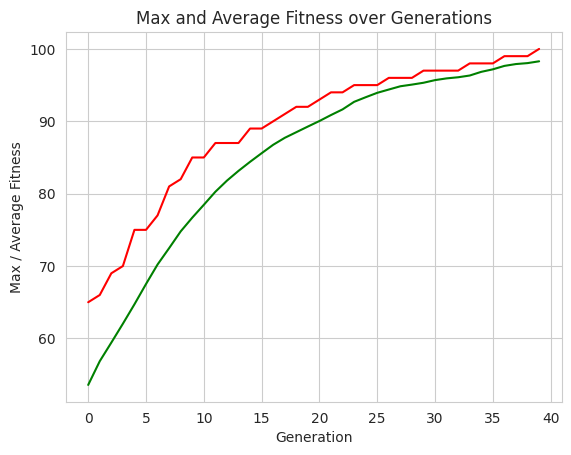

In [24]:
if __name__ == '__main__':
    main()